# 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
train_len = train.shape[0]
test = pd.read_csv('../input/titanic/test.csv')
dataset = pd.concat([train, test]).reset_index(drop=True)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"dataset has {dataset.shape[0]} data.")
dataset.isnull().sum()

dataset has 1309 data.


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 1) Categorical Data

**Sex**

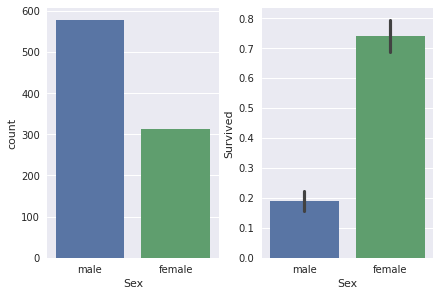

In [7]:
f, ax = plt.subplots(1, 2, constrained_layout=True)
f = sns.countplot(x="Sex", data=train, ax=ax[0])
f = sns.barplot(x="Sex", y="Survived", data=train, ax=ax[1])

Female survived more than male.

In [8]:
# Convert categorical values to numerical
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female": 1}).astype(int)

**Pclass**

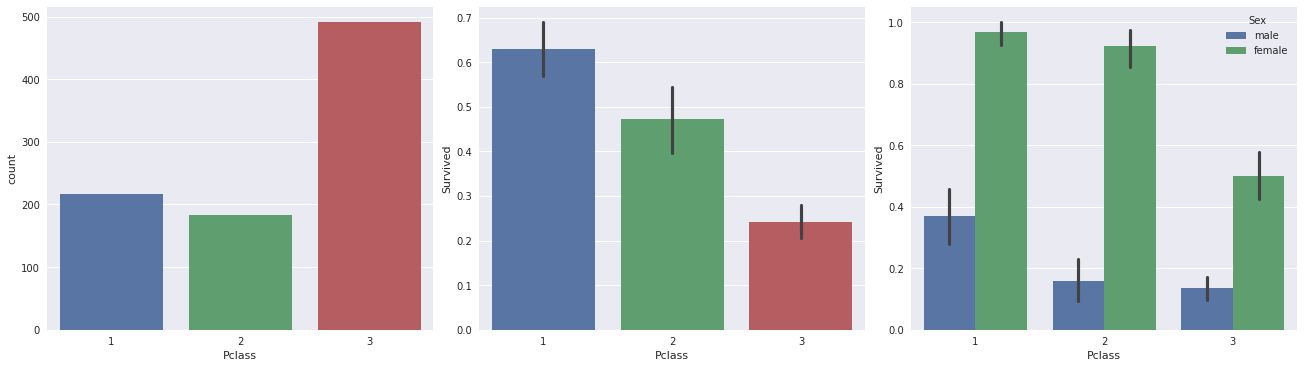

In [9]:
f, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 5))
f = sns.countplot(x="Pclass", data=train, ax=ax[0])
f = sns.barplot(x="Pclass", y="Survived", data=train, ax=ax[1])
f = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train, ax=ax[2])

For both male and female, upper class survived more.

**Embarked**

In [10]:
dataset["Embarked"].isnull().sum()

2

Since Embarked data has 2 missing values, fill them by mode.

In [11]:
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

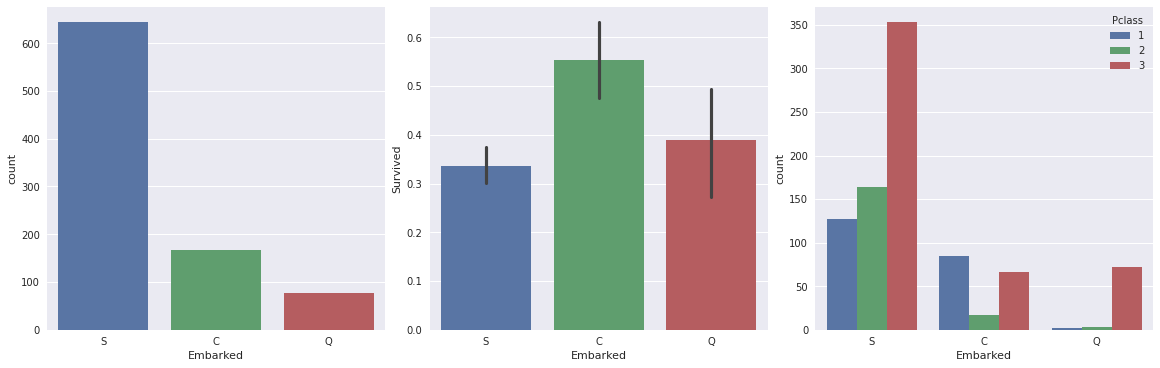

In [12]:
f, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(16, 5))
f = sns.countplot(x="Embarked", data=train, ax=ax[0])
f = sns.barplot(x="Embarked", y="Survived", data=train, ax=ax[1])
f = sns.countplot(x="Embarked", hue="Pclass", data=train, ax=ax[2])

Passengers from Cherbourg survived more. It is because of high rate of 1st class in C passengers.

In [13]:
# Convert categorical values to numerical
dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

**Name**

Extract title from name data.

In [14]:
title = [x.split(',')[1].split(".")[0].strip() for x in dataset["Name"]]
dataset["Title"] = pd.Series(title)
dataset["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [15]:
pd.crosstab(dataset["Sex"], dataset["Title"])

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
0,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0
1,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1


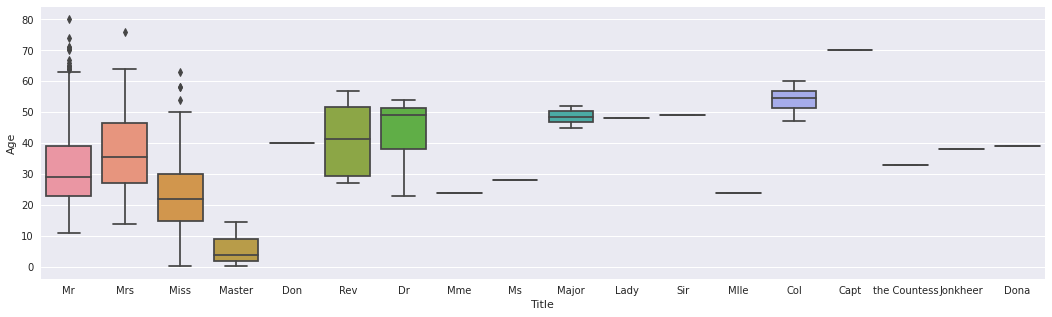

In [16]:
f = plt.figure(figsize=(18, 5))
f = sns.boxplot(x="Title", y="Age", data=dataset)

Categorize rare titles into [Mr, Mrs, Miss, Master]  
Capt, Col, Don, Dr, Jonkheer, Major, Rev, Sir -> Mr  
Mlle, Ms, Lady -> Miss  
Mme, the Countess, Dona -> Mrs

In [17]:
dataset["Title"] = dataset["Title"].replace(["Capt", "Col", "Don", "Dr", "Jonkheer", "Major", "Rev",\
                                             "Sir", "Mlle", "Ms", "Lady", "Mme", "the Countess", "Dona"],
                                           ["Mr"] * 8 + ["Miss"] * 3 + ["Mrs"] * 3)

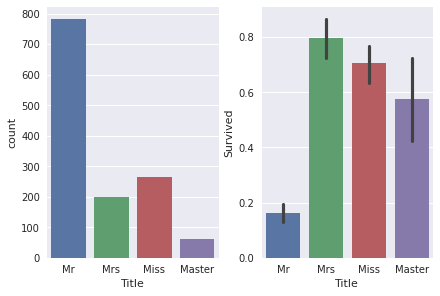

In [18]:
f, ax = plt.subplots(1, 2, constrained_layout=True)
f = sns.countplot(x="Title", data=dataset, ax=ax[0])
f = sns.barplot(x="Title", y="Survived", data=dataset[:train_len], ax=ax[1])

Women and children first.

In [19]:
# Convert categorical values to numerical
dataset["Title"] = dataset["Title"].map({"Master": 0, "Mr": 1, "Mrs": 2, "Miss": 3}).astype(int)

**Ticket**

In [20]:
dataset["Ticket"].unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

Let Ticket_no be number in ticket. If there is no number, input mode.

In [21]:
dataset["Ticket_no"] = dataset["Ticket"].apply(lambda x: x.split()[-1])

In [22]:
dataset["Ticket_no"] = dataset["Ticket_no"].replace("LINE", dataset["Ticket_no"].mode()[0]).astype(int)

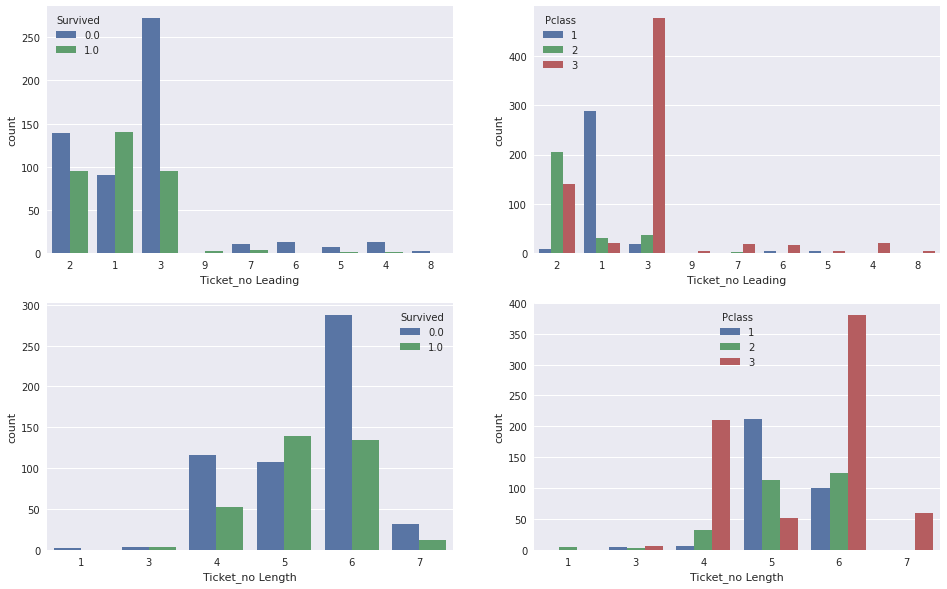

In [23]:
f, ax = plt.subplots(2, 2, figsize=(16, 10))
f = sns.countplot(x=dataset["Ticket_no"][:train_len].apply(lambda x: str(x)[0]),\
                  hue=dataset["Survived"][:train_len], ax=ax[0][0])
f = ax[0][0].set(xlabel="Ticket_no Leading")
f = sns.countplot(x=dataset["Ticket_no"].apply(lambda x: str(x)[0]),\
                  hue=dataset["Pclass"], ax=ax[0][1])
f = ax[0][1].set(xlabel="Ticket_no Leading")
f = sns.countplot(x=dataset["Ticket_no"][:train_len].apply(lambda x: len(str(x))),\
                  hue=dataset["Survived"][:train_len], ax=ax[1][0])
f = ax[1][0].set(xlabel="Ticket_no Length")
f = sns.countplot(x=dataset["Ticket_no"].apply(lambda x: len(str(x))),\
                  hue=dataset["Pclass"], ax=ax[1][1])
f = ax[1][1].set(xlabel="Ticket_no Length")

When leading number is 1 or length is 5, survived more. It is because first class is the most at that cases.

**Cabin**

Extract head of cabin.

In [24]:
dataset["Cabin_head"] = dataset["Cabin"].fillna('X').apply(lambda x: x[0])

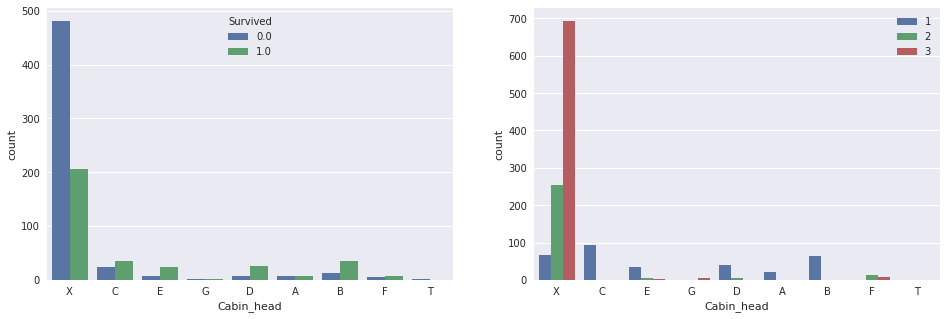

In [25]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
f = sns.countplot(x="Cabin_head", hue="Survived", data=dataset[:train_len], ax=ax[0])
f = sns.countplot(x="Cabin_head", hue="Pclass", data=dataset, ax=ax[1])
f = f.legend(loc='upper right')

Since first class is the most, survived more when head of cabin is in [C, E, D, B].

### 2) Numerical Data

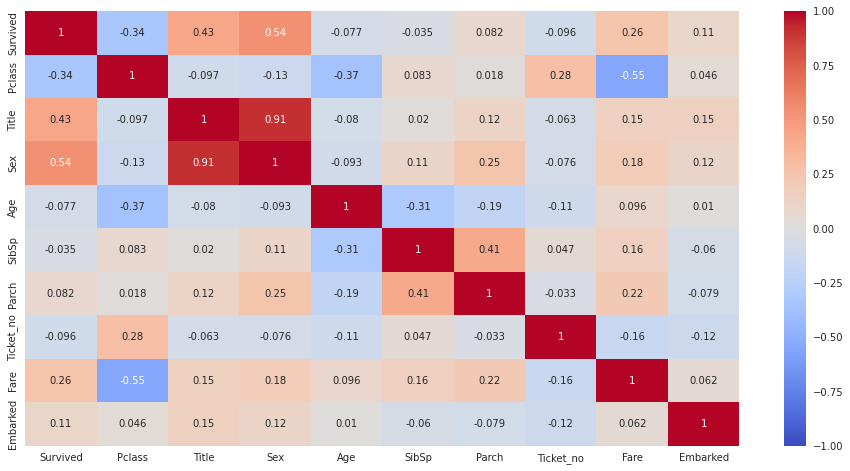

In [26]:
f = plt.figure(figsize=(16, 8))
f = sns.heatmap(dataset[["Survived", "Pclass", "Title", "Sex", "Age", "SibSp", "Parch",\
                       "Ticket_no", "Fare", "Embarked"]][:train_len].corr(), \
               annot=True, cmap='coolwarm', vmin=-1)

**Age**

In [27]:
dataset["Age"].isnull().sum()

263